In [8]:
# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from tensorflow.keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

In [9]:
# Read data from csv file for training and validation data
TrainingSet = numpy.genfromtxt("Query_1.xlsx - Query1.csv", delimiter=",", skip_header=True)
ValidationSet = numpy.genfromtxt("validation.csv", delimiter=",", skip_header=True)

# Split into input (X) and output (Y) variables
X1 = TrainingSet[:,0:6]
Y1 = TrainingSet[:,6]

X2 = ValidationSet[:,0:6]
Y2 = ValidationSet[:,6]

In [10]:
# Create model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=6))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X1, Y1, validation_data=(X2, Y2), epochs=500, batch_size=100, verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X1)
PredValSet = model.predict(X2)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

Epoch 1/500


c:\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


87/87 - 2s - loss: 834822.0625 - val_loss: 55704.9570 - 2s/epoch - 17ms/step
Epoch 2/500
87/87 - 0s - loss: 34430.9805 - val_loss: 34460.2227 - 309ms/epoch - 4ms/step
Epoch 3/500
87/87 - 0s - loss: 29717.2852 - val_loss: 28681.5918 - 307ms/epoch - 4ms/step
Epoch 4/500
87/87 - 0s - loss: 27395.0527 - val_loss: 25848.4668 - 173ms/epoch - 2ms/step
Epoch 5/500
87/87 - 0s - loss: 25378.5312 - val_loss: 24154.2070 - 143ms/epoch - 2ms/step
Epoch 6/500
87/87 - 0s - loss: 22803.4785 - val_loss: 23326.9102 - 145ms/epoch - 2ms/step
Epoch 7/500
87/87 - 0s - loss: 22061.4961 - val_loss: 23206.2246 - 137ms/epoch - 2ms/step
Epoch 8/500
87/87 - 0s - loss: 21053.6348 - val_loss: 22241.1816 - 327ms/epoch - 4ms/step
Epoch 9/500
87/87 - 0s - loss: 19530.0117 - val_loss: 20198.3867 - 417ms/epoch - 5ms/step
Epoch 10/500
87/87 - 0s - loss: 18810.2227 - val_loss: 19872.3809 - 192ms/epoch - 2ms/step
Epoch 11/500
87/87 - 0s - loss: 17961.6465 - val_loss: 18796.6504 - 182ms/epoch - 2ms/step
Epoch 12/500
87/87 - 

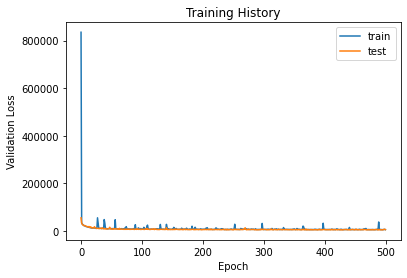

In [11]:
# Plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.title('Training History'),
plt.xlabel('Epoch'),
plt.ylabel('Validation Loss')
pyplot.show()

Training Set R-Square= 0.8273201900567198


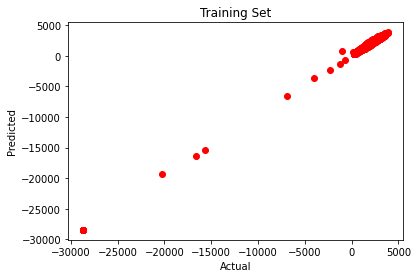

In [12]:
# Plot actual vs prediction for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(Y1,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for training set
TestR2Value = r2_score(Y1,TestResults)
print("Training Set R-Square=", TestR2Value)

Validation Set R-Square= 0.7992188802432316


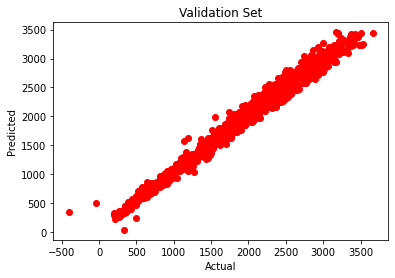

In [13]:
# Plot actual vs prediction for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(Y2,ValResults,'ro')
plt.title('Validation Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for validation set
ValR2Value = r2_score(Y2,ValResults)
print("Validation Set R-Square=",ValR2Value)